NAMA : MUHAMMAD IMAM ARIQ SYA'BANA (20106050041)

## Simple linear regression

Pada notebook kali ini, kita akan mempelajari tentang simple linear regression. Linear Regression
atau Regresi Linier adalah salah satu metode supervised learning dalam machine learning.
Berbeda dengan metode klasifikasi yang memprediksi kelas atau kategori sebuah item, regresi
linier berfungsi untuk memprediksi sebuah nilai berdasarkan atribut yang tersedia. Yang
diprediksi adalah sejauh mana hubungan sebab akibat antara Variabel Faktor Penyebab (x)
terhadap variabel akibat (y).

Apabila variabel bebasnya hanya satu, maka analisis regresinya menggunakan regresi linier
sederhana. Apabila variabel bebasnya lebih dari satu, maka analisis regresinya menggunakan
regresi linier berganda.

Contoh penggunaan analisis regresi linier sederhana antara lain:


*   Hubungan antara jumlah pekerja dengan jumlah produksi
*   Hubungan antara lama waktu bekerja dengan jabatan yang dimiliki saat ini
*   Hubungan antara lama waktu PDKT dengan keberhasilan mendapat jodoh


Secara sederhana regresi linier adalah teknik untuk memprediksi sebuah nilai dari variable Y
(variabel dependen) berdasarkan beberapa variabel tertentu X (variabel independen) jika
terdapat hubungan linier antara X dan Y. Untuk teori lengkap mengenai regresi linier sederhana,
dapat dilihat artikel tulisan ole R. Kukuh di medium 


Dapat kita lihat juga bahwa garis regresi yang kita buat tidak tepat mengenai semua titik-titik
variabelnya. Jarak dari garis regresi ke titik-titik variabel ini lah yang akan menjadi nilai error dari
permodelan regresi kita

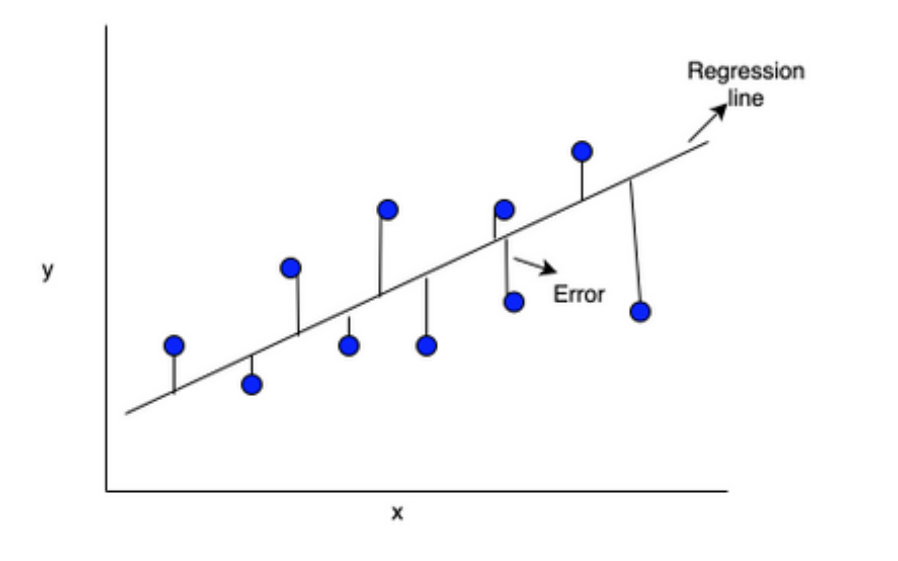

## Bermain dengan data sembarang

membuat suatu data buatan untuk mencari hubungan antara keduanya

In [1]:
# mengimport library dan package yang dibutuhkan 

import numpy as np #untuk perhitungan santifik
import matplotlib.pyplot as plt #untuk plotting
from sklearn.linear_model import LinearRegression # import library linearRegression dari scikit learn


In [2]:
# membuat data 
penjualan = np.array([6,5,5,4,4,3,2,2,2,1])
harga = np.array([16000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

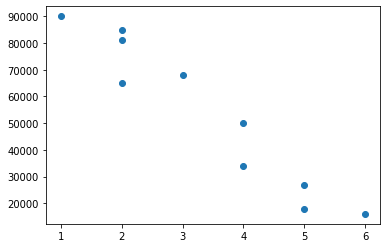

In [3]:
#buat plot
%matplotlib inline
plt.scatter(penjualan, harga)

In [4]:
#buat pemodelan regresi
penjualan = penjualan.reshape(-1,1) #menukan baris dan kolom variabel 

linsreg = LinearRegression()
linsreg.fit(penjualan, harga)

LinearRegression(copy_X = True, fit_intercept = True, n_jobs = None, normalize = False)

LinearRegression(normalize=False)

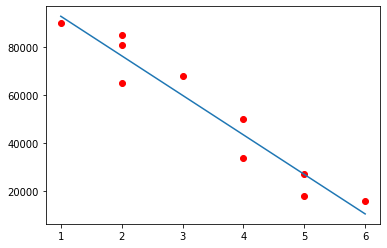

In [5]:
#plot hasil regresi

plt.scatter(penjualan, harga, color = 'red')
plt.plot(penjualan, linsreg.predict(penjualan))

Kita dapat melihat hubungan antara kedua variabel yang kita buat. Dalam hal ini saya membuat
hubungan antara jumlah penjualan dengan harga barang. Dapat dilihat, semakin murah harga
barang, maka jumlah penjualan naik.


## Bermain dengan Dataset

Pada notebook ini, kita akan belajar cara menggunakan library scikit-learn pada python untuk
membuat permodelan regresi linier sederhana. Data yang akan kita gunakan adalah dataset
konsumsi bahan bakar pada mobil yang kita dapat dari IBM Object Storage

In [6]:
#import library dan package yang dibutuhkan

import pandas as pd #untuk tabel dataframe
import pylab as pl #untuk plotting
%matplotlib inline

In [7]:
#download data 

!wget -O !wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2022-10-04 14:39:42--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   386KB/s    in 0.2s    

2022-10-04 14:39:43 (386 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Dataset ini berisi data konsumsi bahan bakal dan estimasi emisi karbon dioksida pada beberapa model kendaraan yang dijual di Canada. Dataset berisi data: 


*   MODELYEAR
*   MAKE
*   MDOEL
*   VEHICLE CLASS
*   ENGINE CLASS
*   CYLINDERS
*   TRANSMISSION
*   FUEL CONSUMPTION in CITY(L/100 km)
*   FUEL CONSUMPTION in HWY(L/100 km)
*   FUEL CONSUMPTION in COMB(L/100 km)
*   CO2 EMISSION (g/km)






In [8]:
df = pd.read_csv("/content/FuelConsumption.csv") # membaca data

In [9]:
#melihat 5 baris pertama data
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
#kita ambil kolom mana saja yang akan kita analisis, dan membuang sisanya

cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,6.0,136
3,3.5,6,12.7,255
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,11.8,232
7,3.7,6,12.8,255
8,3.7,6,13.4,267


Sebagai contoh, kita lihat hubungan antara variabel konsumsi bahan bakar di kota dengan emisi
CO2


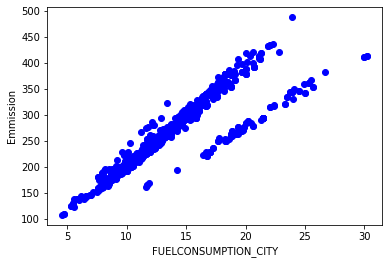

In [19]:
# melakukan plot hubungan antara konsumsi bahan bakar dengan emisis CO2 

plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emmission")
plt.show()

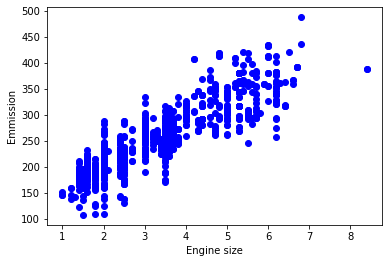

In [12]:
# plot hubungan antara variabel ukuran mesin dengan emisi CO2

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emmission")
plt.show()

## Melakukan data splitting

Dalam membuat permodelan Machine Learning, merupakan suatu hal yang lazim untuk
membagi data ke dalam data latih (train) dan data uji (test). Kita gunakan data latih untuk
melatih model, dan data uji untuk menilai performa dari permodelan yang kita buat. Hal ini kita
lakukan untuk mensimulasikan, apakah model kita dapat bekerja dengan baik dalam
menganalisa kasus yang belum pernah ia temui sebelumnya


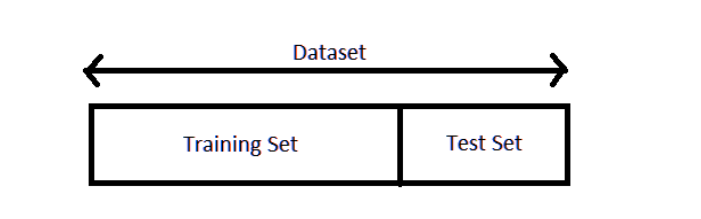

In [13]:
# data latih sekitar 70-80% dari semua data, dan sisanya adalah data latih
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]


Selanjutnya mencari hubungan antara ukuran mesin dengan emisi CO2 pada kendaraan

<function matplotlib.pyplot.show(*args, **kw)>

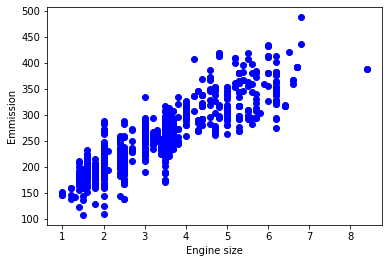

In [14]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emmission")
plt.show

## Membuat model Regresi

In [15]:
#membuat model regresi
regr = LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

LinearRegression()

In [16]:
#mencari koefisien model
print('Coefficients : ', regr.coef_)
print('Intercept : ', regr.intercept_)

Coefficients :  [[39.49008366]]
Intercept :  [124.05423259]


Dalam membuat model regresi, sebenarnya kita mencari nilai-nilai Coefficient
(gradien/kemiringan) dan Intercept yang kita sebut parameter model. Untuk memahami hal ini,
disarankan untuk mempelajari persamaan garis dan teori dasar regresi linier pada tautan yang
sudah diberikan

Text(0, 0.5, 'Emission')

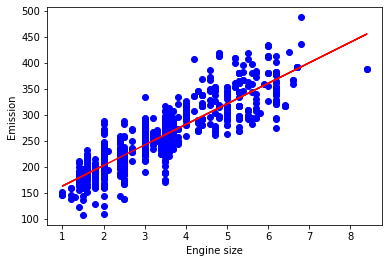

In [17]:
#plot hasil regresi

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [18]:
#menghitung error

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error : %.2f " % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean(np.absolute(test_y_ -test_y) **2))
print("R2-score : %.2f" % r2_score(test_y_ , test_y))

Mean absolute error : 21.93 
Residual sum of squares (MSE): 938.46
R2-score : 0.69


Dapat kita lihat, bahwa error yang dihasilkan model regresi yang kita buat cukup besar. Hal ini
dikarenakan masih banyak faktor lain yang memengaruhi emisi CO2 pada kasus di atas.
Permodelan regresi linier sederhan masih tergolong metode machine learning yang masih dasar.
Oleh karena itu, kita perlu menggunakan metode machine learning yang lebih powerful lagi.